In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

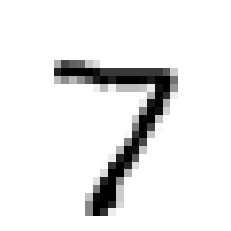

In [39]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X_test[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [3]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## K-nearest neighbord

In [5]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer


param_grid = [
        {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform','distance']}
        ]

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_macro': make_scorer(f1_score, average = 'macro'),
           'f1_weighted': make_scorer(f1_score, average = 'weighted')}

model = KNeighborsClassifier()

grid_search = GridSearchCV(model, param_grid, cv=2, 
                           scoring=scoring, verbose=3, refit=False)

grid_search.fit(X_train, y_train)
cv_results = pd.DataFrame.from_dict(grid_search.cv_results_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END n_neighbors=3, weights=uniform; accuracy: (test=0.966) f1_macro: (test=0.965) f1_weighted: (test=0.966) precision: (test=0.966) recall: (test=0.965) total time=  47.5s
[CV 2/2] END n_neighbors=3, weights=uniform; accuracy: (test=0.965) f1_macro: (test=0.964) f1_weighted: (test=0.964) precision: (test=0.965) recall: (test=0.964) total time=  45.0s
[CV 1/2] END n_neighbors=3, weights=distance; accuracy: (test=0.967) f1_macro: (test=0.967) f1_weighted: (test=0.967) precision: (test=0.967) recall: (test=0.966) total time=  42.9s
[CV 2/2] END n_neighbors=3, weights=distance; accuracy: (test=0.966) f1_macro: (test=0.965) f1_weighted: (test=0.966) precision: (test=0.966) recall: (test=0.965) total time=  43.8s
[CV 1/2] END n_neighbors=5, weights=uniform; accuracy: (test=0.963) f1_macro: (test=0.963) f1_weighted: (test=0.963) precision: (test=0.964) recall: (test=0.963) total time=  47.4s
[CV 2/2] END n_neighbors=5, weigh

In [36]:
cv_results.dtypes

mean_fit_time              float64
std_fit_time               float64
mean_score_time            float64
std_score_time             float64
param_n_neighbors           object
param_weights               object
params                      object
split0_test_accuracy       float64
split1_test_accuracy       float64
mean_test_accuracy         float64
std_test_accuracy          float64
rank_test_accuracy           int32
split0_test_precision      float64
split1_test_precision      float64
mean_test_precision        float64
std_test_precision         float64
rank_test_precision          int32
split0_test_recall         float64
split1_test_recall         float64
mean_test_recall           float64
std_test_recall            float64
rank_test_recall             int32
split0_test_f1_macro       float64
split1_test_f1_macro       float64
mean_test_f1_macro         float64
std_test_f1_macro          float64
rank_test_f1_macro           int32
split0_test_f1_weighted    float64
split1_test_f1_weigh

In [39]:
cv_results.loc[cv_results['rank_test_f1_weighted']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_accuracy,split1_test_accuracy,mean_test_accuracy,...,split0_test_f1_macro,split1_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro,split0_test_f1_weighted,split1_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
1,0.312617,0.007292,43.166213,0.426594,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.9668,0.9657,0.96625,...,0.966611,0.965437,0.966024,0.000587,1,0.966729,0.965637,0.966183,0.000546,1


In [57]:
from sklearn.metrics import accuracy_score
%time
print('KNN Accuracy: %.3f' % accuracy_score(y_test,prediction))

Wall time: 0 ns
KNN Accuracy: 0.971
